In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [2]:
df_path = '../data/processed/cleaned_music_population.csv'
df = pd.read_csv(df_path)

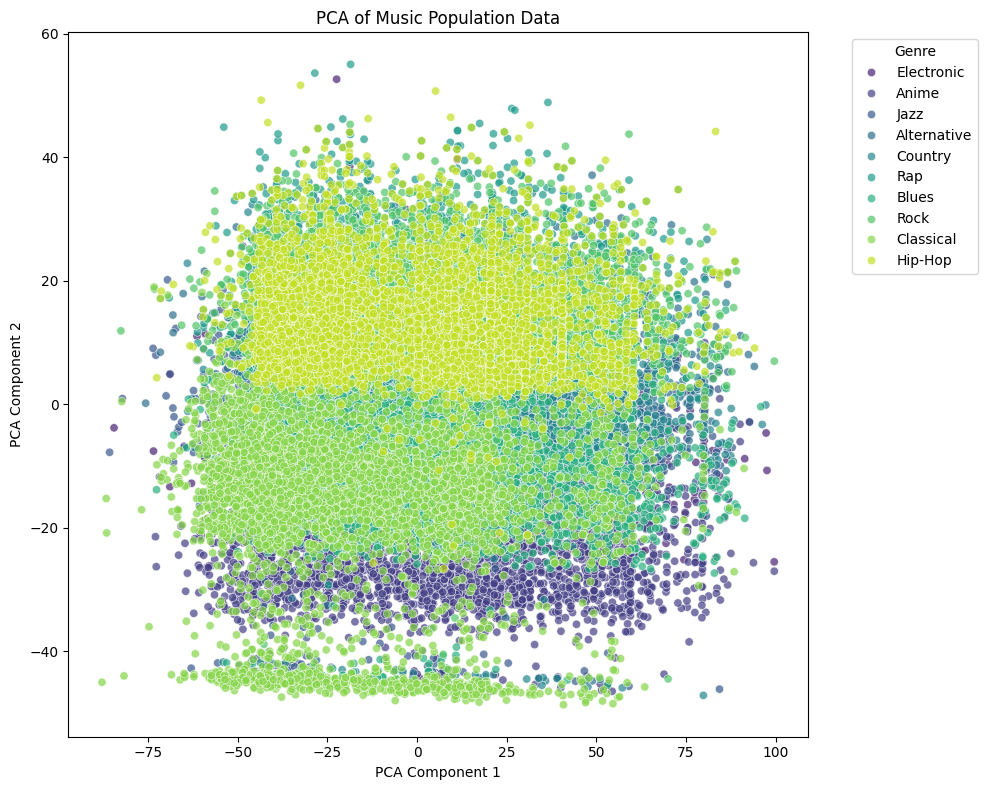

In [4]:
df_onehot = pd.get_dummies(df, drop_first=True)
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_onehot)
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
# Add the 'Genre' column to the PCA DataFrame
pca_df['Genre'] = df['music_genre']
# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Genre', palette='viridis', alpha=0.7)
plt.title('PCA of Music Population Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
print("Explained variance ratio:", pca.explained_variance_ratio_.sum())

Explained variance ratio: 0.9724904701814334


Explicamos gran parte de la varianza solo con 2 features, podriamos en un futuro, utilizar estas dos features para entrenar modelos mas robustos y optimizar el tiempo.